# Linear Regression For Bike Sharing Buisness
Bike sharing is online platform where users book the bikes for self use. Pick up from one location and drop at other. Pandemic hit the buisness a bit. Now the company wants to analyse the driving factor in particular region boost the buisness for future. There are various factors are available in dataset, like rentals count, atmosphere conditions, date wise entries of share count. This data is available for 2018 & 2019.

Let us first import NumPy and Pandas and read the bike sharing dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [2]:
#Reading dataset
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
day.shape 

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1. No null objects present in data set.
2. Some categorical variables are expressed as integers, we shall convert those for better understanding in analysis.

In [5]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Converting categorical variables from numbers to string

In [6]:
day['weathersit']=day['weathersit'].apply(lambda x: 'Clear-Partly cloudy' if x == 1 else('Mist-Few clouds' if x==2 else('Light Snow' if x==3 else 'Snow + Fog')))


In [7]:
day['mnth']=day['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})


In [8]:
day['weekday'] = day['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0:'Tue'})


In [9]:
day['season']=day['season'].apply(lambda x: 'Spring' if x == 1 else('Summer' if x==2 else('Fall' if x==3 else 'Winter')))
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,0,Mist-Few clouds,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,0,Mist-Few clouds,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,Clear-Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thurs,1,Clear-Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,Clear-Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Univariate & Bivariate

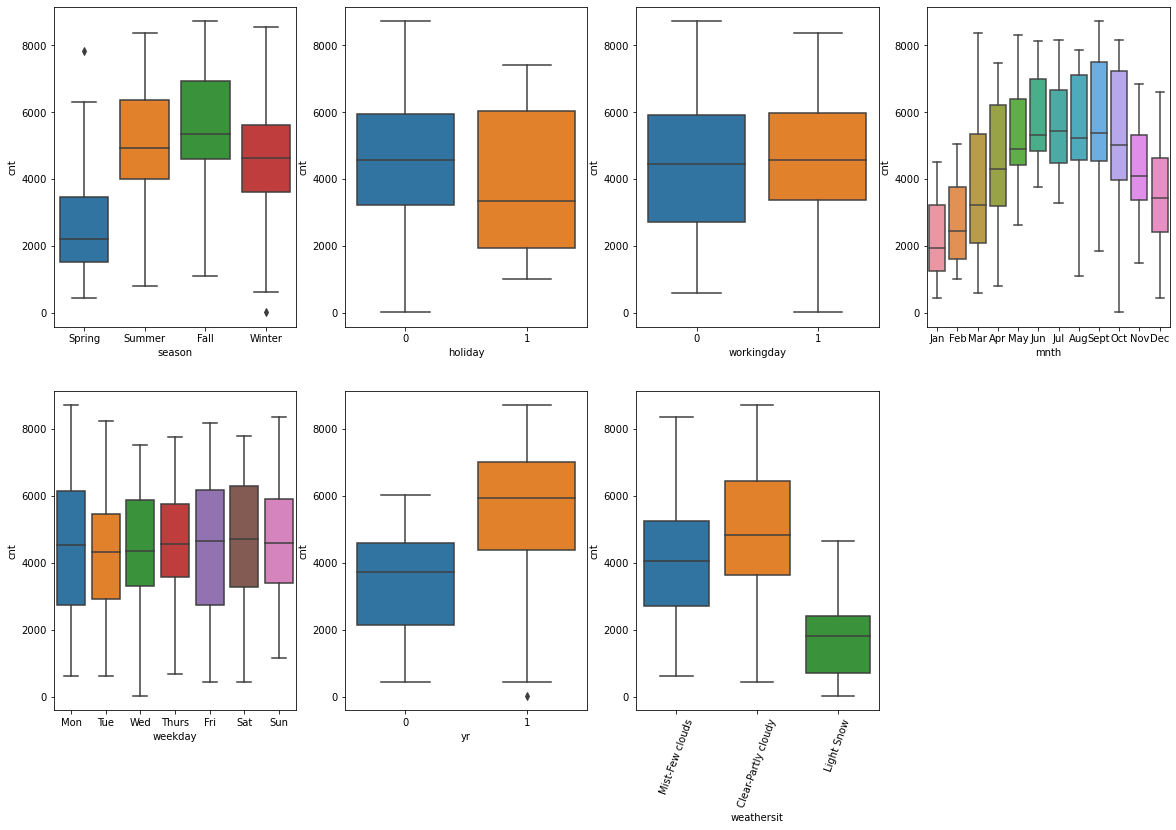

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))  
plt.subplot(3,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(3,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(3,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.subplot(3,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(3,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(3,4,6)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(3,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.xticks(rotation=70)
plt.show()

**Observation of effect on "Count" by other factors**
1. Seaons "Summer" & "Fall" have somewhat more Bicycle borrowers
2. On holidays bike riders reduce
3. Working day has no much impact on total count
4. May to Sept has comparatively higher demands in year
5. Year 2019 seen higher number of bikers than 2018
6. Clear weather has highest bike rentals while Cloudy have less rentals. Light Snow condition has further deep in rentals.

In [11]:
day['weathersit'].astype('category').value_counts() # to confirm if Heavy thunderstorm weather has any bike rentals 

Clear-Partly cloudy    463
Mist-Few clouds        246
Light Snow              21
Name: weathersit, dtype: int64

Checking relation of numerical variables on target variable

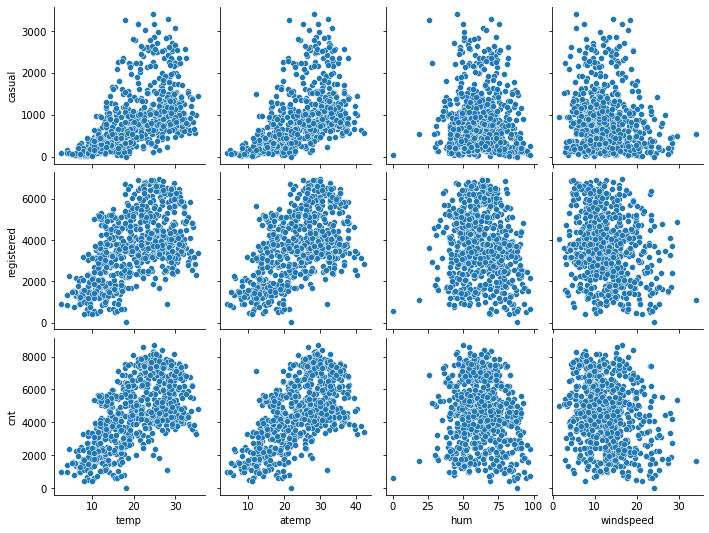

In [12]:
sns.pairplot(day, x_vars=['temp','atemp','hum','windspeed'], y_vars=['casual', 'registered', 'cnt'])
plt.show()

1. "temp" & "atemp" has very strong relation with the count and shall be considered in the linear regression model.
2. Effect of "hum" & "windspeed" on bike rentals seems minimal, need to confirm further with Coorr plot
3. Workingday affects casual users while does not afect much registered user, showing their dedication
   While Holiday affects both Casual & Registered user, it means Registered users are not affected by weekend but Holiday.
4. Year 2019 has positive growth in rentals can be clearely seen in both Casual & Registered. So year will be definately a part in the model.

### Dummy variable cration

In [13]:
day_for_dummies=day[['season', 'mnth', 'weekday', 'weathersit']]

In [14]:
day_dummies = pd.get_dummies(day_for_dummies, drop_first=True)
day_dummies.tail()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
729,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
day_1 = day.drop(day_for_dummies.columns, axis=1)
day_2 = day_1.drop(['instant', 'dteday'], axis =1)
day_3 = pd.concat([day_2, day_dummies], axis=1 )
day_3.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


### Test-Train data split

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(day_3, train_size=0.7, random_state=100)
print(train.shape, test.shape)

(510, 32) (220, 32)


### Scaling numeric variables

In [17]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

To get scaling output in form of dataframe "vars" is created

In [18]:
vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
train[vars] = scaler.fit_transform(train[vars])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,...,0,0,0,0,1,0,0,0,0,1


In [19]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,0.513499,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,0.224421,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

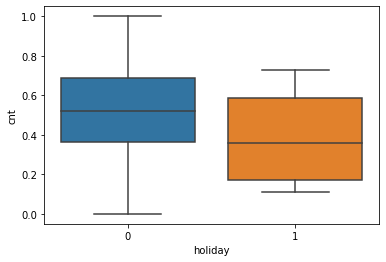

In [20]:
sns.boxplot(x = 'holiday', y = 'cnt', data = train)

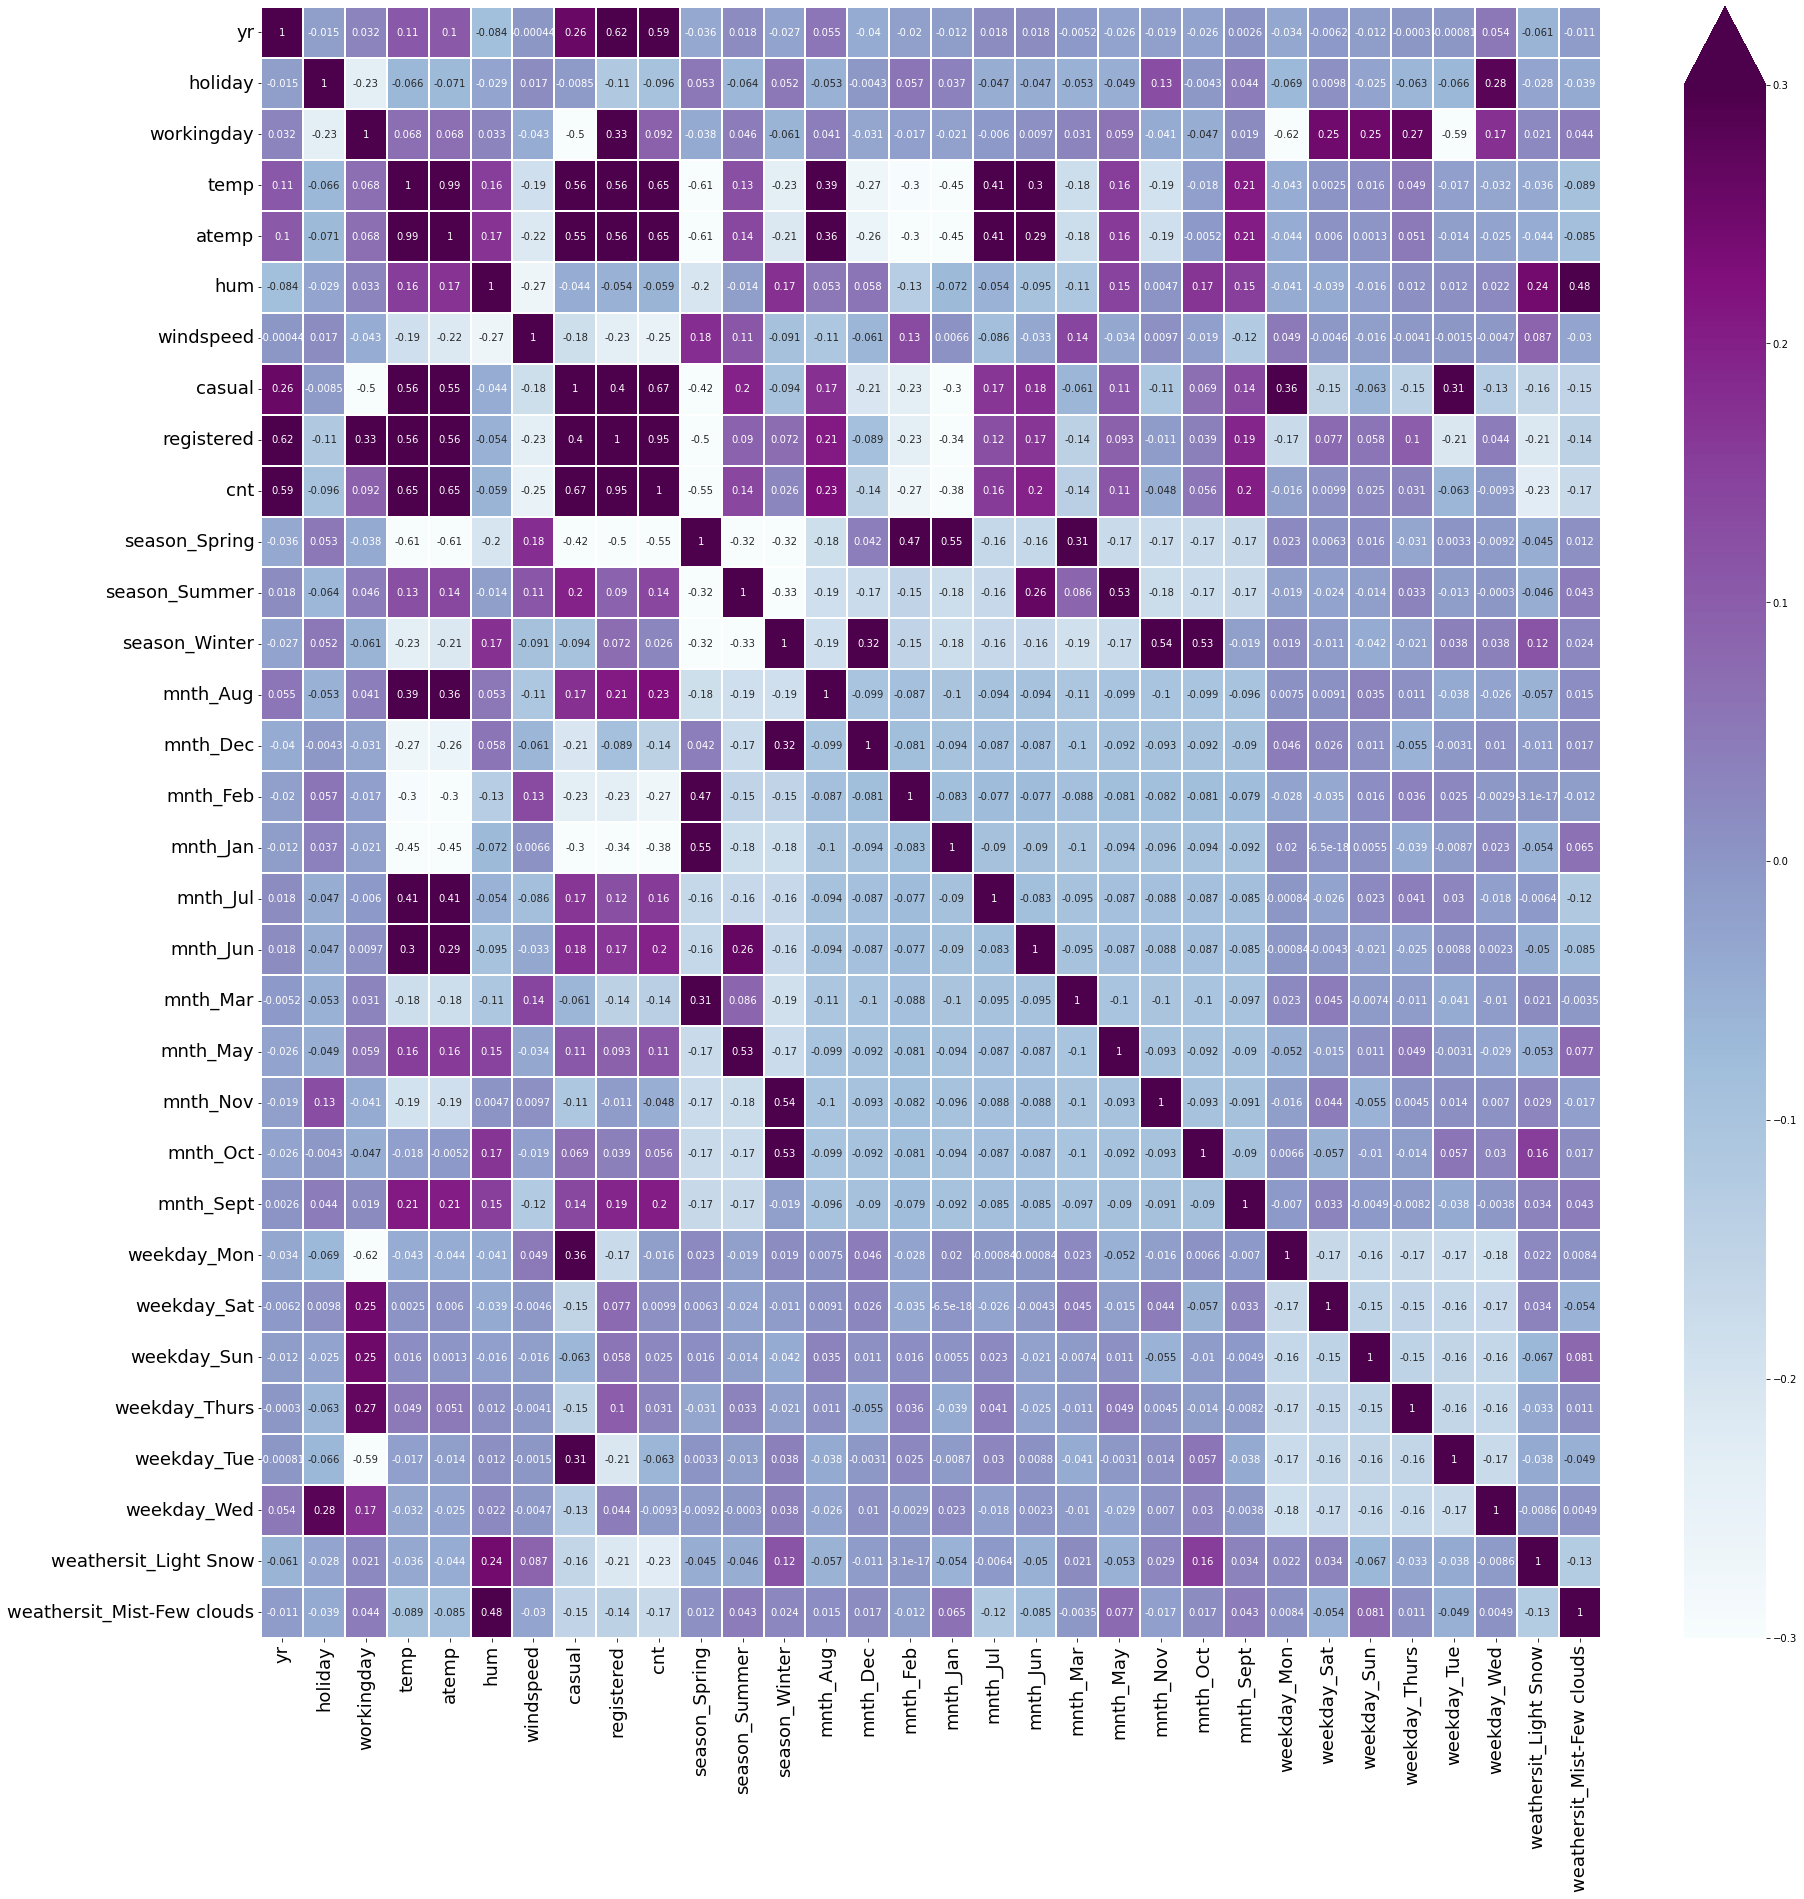

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
res = sns.heatmap(train.corr(), annot = True,cmap="BuPu",fmt="0.2g",vmin=-0.3,vmax=0.3,linewidths=0.05,cbar_kws={'extend': 'max'})
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.xaxis.set_label_position('top')
plt.show()

**Correlation obseravtion**
1. Cnt has positive strong relation (coorr >0.5)with "yr" & "temp"
2. Cnt has positive moderate relation (coorr < 0.5) with time period in year from jun to sept
3. Cnt has negative relation with windspeed, time period (Dec to Feb), spring season and Snowy & Misty weather

Removing Casual and Registered from target group & keeping only cnt

In [22]:
y_train = train.pop('cnt')

In [23]:
X_train = train.drop(['casual', 'registered', 'atemp'], axis =1)

In [24]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

linreg = sm.OLS(y_train, X_train_lm).fit()

linreg.params

const                         0.240908
yr                            0.232438
holiday                       0.006745
workingday                    0.092880
temp                          0.445359
hum                          -0.151473
windspeed                    -0.186010
season_Spring                -0.044834
season_Summer                 0.043002
season_Winter                 0.107632
mnth_Aug                      0.020376
mnth_Dec                     -0.044277
mnth_Feb                     -0.032441
mnth_Jan                     -0.063315
mnth_Jul                     -0.033848
mnth_Jun                      0.004602
mnth_Mar                      0.001274
mnth_May                      0.024673
mnth_Nov                     -0.039879
mnth_Oct                      0.007546
mnth_Sept                     0.085938
weekday_Mon                   0.097752
weekday_Sat                  -0.003636
weekday_Sun                   0.005495
weekday_Thurs                -0.012436
weekday_Tue              

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
print(lm.coef_)
print(lm.intercept_)

[ 2.32437541e-01 -3.38237897e+12 -3.38237897e+12  4.62646484e-01
 -1.48437500e-01 -1.55264854e-01 -8.20312500e-02  3.72314453e-03
  8.86230469e-02 -2.11181641e-02 -2.97851562e-02 -3.22265625e-02
 -4.43115234e-02 -5.99975586e-02  5.98144531e-03  3.22265625e-02
  3.21044922e-02 -6.05468750e-02  4.51660156e-03  6.88705444e-02
 -3.38237897e+12 -1.24206543e-02  3.60107422e-03  1.73206329e-02
 -3.38237897e+12 -2.29492188e-02 -2.55981445e-01 -5.56030273e-02]
3382378969021.2905


In [28]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          3.00e-181
Time:                        21:24:46   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2409      0.036      6.786      0.000       0.171       0.311
yr                             0.2324      0.008     28.819      0.000       0.217       0.248
holiday                        0.0067      0.024      0.278      0.781      -0.041       0.054
workingday                     0.0929      0.012      7.707      0.000       0.069       0.117
temp                           0.4454      0.046      9.628      0.000       0.354       0.536
hum                           -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed                     -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_Spring                 -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_Summer                  0.0430      0.026      1.645      0.101      -0.008       0.094
season_Winter                  0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug                       0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec                      -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb                      -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan                      -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul                      -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun                       0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar                       0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May                       0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov                      -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct                       0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept                      0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon                    0.0978      0.014      7.231      0.000       0.071       0.124
weekday_Sat                   -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sun                    0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thurs                 -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tue                    0.0435      0.014      3.173      0.002       0.017       0.070
weekday_Wed                   -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_Light Snow         -0.2558      0.026     -9.699      0.000      -0.308      -0.204
weathersit_Mist-Few clouds    -0.0596      0.010     -5.709      0.000      -0.080      -0.039
===========================================

### As 'RFE', 'VIF', addition of constant procedure will be done multiple times, hence creating function to reduce code occurance

In [29]:
#Defination of RFE function
def rfe(y):
    from sklearn.feature_selection import RFE
    #RFE attributes defination
    x = RFE(lm, n_features_to_select =y)

    # Implementing RFE
    x.fit(X_train, y_train)
    return x
    print(x.support_)
    print(x.ranking_)

In [30]:
def addrfe_2_data(y):
    rfe_1_col = X_train.columns[y.support_]

    #Adding constant to new X_train
    x = sm.add_constant(X_train[rfe_1_col])
    return x

In [31]:
def vif(y):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    df= y.drop('const',axis=1)
    x = pd.DataFrame()
    x['Feature'] = df.columns
    x['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    x['VIF'] = round(x['VIF'], 2)
    x = x.sort_values(by = "VIF", ascending = False)
    return x

Overall iteration flow would be
1. rfe_i = rfe(number of predictor variables).....function
2. X_train_rfe_i = addrfe_2_data(rfe_i).....function
3. model fitting 
4. df_vif = vif(X_train_rfe1).....function

## 1st iteration --> Reducing predictor variables to 13 (50%)

Using Recursive Feature Elimination further to check if R2 & adjusted R2 is changing.Here we would use 13 parameters for 1st iteration, 50% of original.

In [32]:
rfe_1=rfe(13) #Using predefined function

### Using the 13 features into the model and checking the fit

In [33]:
X_train_rfe1 = addrfe_2_data(rfe_1) #Using predefined function
X_train_rfe1.shape

(510, 14)

In [34]:
#Fiting linear model
linreg_1 = sm.OLS(y_train, X_train_rfe1).fit()
print(linreg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.40e-186
Time:                        21:24:46   Log-Likelihood:                 500.58
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     497   BIC:                            -920.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

By reducing the predictor variables from 26 to 13, has changed the R2-->83.6 and adjusted R2-->83.2 from 85% & 84% resp. Now further to make model more simple, some more variables redundancy have to be checked. Above summary shows some variables with hogh p-value. But they cant be straight away removed. It has be checked along with VIF.

In [35]:
df_vif = vif(X_train_rfe1) #using predefined VIF function
df_vif

,Feature,VIF
2,workingday,36.14
9,weekday_Mon,8.81
10,weekday_Tue,8.60
1,holiday,2.31
3,temp,2.09
4,hum,1.82
6,season_Spring,1.65
12,weathersit_Mist-Few clouds,1.54
7,mnth_Jul,1.30
11,weathersit_Light Snow,1.25


As 'working day' has very high VIF, still we will keep it & further run the next iteration with 10 variables.

## 2nd iteration --> Reducing predictor variables to 10

In [36]:
rfe_2 = rfe(10)
X_train_rfe_2 = addrfe_2_data(rfe_2)

In [37]:
rfe_2.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 17,  5, 12,  8,  9,  6,  2, 16, 18, 10,
        7, 14,  4,  1, 15, 19, 13,  1, 11,  1,  3])

In [38]:
X_train_rfe_2.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_Spring,weekday_Mon,weekday_Tue,weathersit_Light Snow
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,0,0,0


In [39]:
#Fiting linear model
linreg_2 = sm.OLS(y_train, X_train_rfe_2).fit()
print(linreg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          7.11e-175
Time:                        21:24:47   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

1. **R2 & ajusted R2** both have reduced by little margin and reached to **81.2% & 80.8%**, so reduction of variables can be accepted.
2. **P-value of "holiday" variable has come down from 0.75 to 0.17 level now.** Hence can be inferred that variable has become significant in the 2nd iteration

In [40]:
df_vif2 = vif(X_train_rfe_2) #using predefined VIF function
df_vif2

,Feature,VIF
2,workingday,32.66
7,weekday_Mon,8.05
8,weekday_Tue,7.70
1,holiday,2.14
3,temp,1.63
6,season_Spring,1.62
4,hum,1.21
5,windspeed,1.13
9,weathersit_Light Snow,1.10
0,yr,1.03


## 3rd Iteration --> Reducing predictor variables to 6

In [41]:
rfe_3 = rfe(6)
X_train_rfe_3 = addrfe_2_data(rfe_3)
rfe_3.ranking_

array([ 2,  1,  1,  1,  4,  3,  5, 21,  9, 16, 12, 13, 10,  6, 20, 22, 14,
       11, 18,  8,  1, 19, 23, 17,  1, 15,  1,  7])

In [42]:
X_train_rfe_3.head()

,const,holiday,workingday,temp,weekday_Mon,weekday_Tue,weathersit_Light Snow
576,1.0,0,1,0.815169,0,0,0
426,1.0,0,0,0.442393,1,0,0
728,1.0,0,0,0.245101,0,1,0
482,1.0,0,0,0.395666,1,0,0
111,1.0,0,1,0.345824,0,0,0


In [43]:
#Fiting linear model
linreg_3 = sm.OLS(y_train, X_train_rfe_3).fit()
print(linreg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     87.66
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           3.19e-66
Time:                        21:24:47   Log-Likelihood:                 198.46
No. Observations:                 510   AIC:                            -384.9
Df Residuals:                     504   BIC:                            -359.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

**The R2 & adjusted R2 value has reduced drastically with 6 predictor variables, hence need more variables.** Discarding 3rd iteration. Also as "working day" has highest VIF value 32, hence for last iteration we would drop this variable.

## 4th Iteration -> Increasing predictor variables to 7

In [44]:
rfe_4 = rfe(7) #using function 1
X_train_rfe_4 = addrfe_2_data(rfe_4)  #using function 2

#Fiting linear model
linreg_4 = sm.OLS(y_train, X_train_rfe_4).fit()
print(linreg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.69e-139
Time:                        21:24:47   Log-Likelihood:                 371.73
No. Observations:                 510   AIC:                            -729.5
Df Residuals:                     503   BIC:                            -699.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.05

The R2 & adjusted R2 value with 7 predicter variables seems in acceptable range. We can further increase the variable number and check the variance. For now we will proceed with 7 variables.

In [45]:
df_vif4 = vif(X_train_rfe_4) #using predefined VIF function
df_vif4

,Feature,VIF
2,workingday,5.51
4,weekday_Mon,1.91
5,weekday_Tue,1.88
1,holiday,1.11
0,yr,1.02
3,temp,1.02
6,weathersit_Light Snow,1.01


**VIF of "working day" has reduced drastically** as overall variables reduced.
Other variables VIF well below threshold i.e. 5.

An iteration can be done just to improve R2 number by removing variable "working day" from data set, as it had high VIF initially. So other variable can be used instead of "working day" which has low VIF.

## 5th Iteration-> Removing "working day" & considering other variable

In [46]:
X_train = X_train.drop('workingday', axis=1)

In [47]:
rfe_5 = rfe(7) #using function 1
X_train_rfe_5 = addrfe_2_data(rfe_5)  #using function 2

#Fiting linear model
linreg_5 = sm.OLS(y_train, X_train_rfe_5).fit()
print(linreg_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     281.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.78e-169
Time:                        21:24:47   Log-Likelihood:                 445.46
No. Observations:                 510   AIC:                            -874.9
Df Residuals:                     502   BIC:                            -841.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

R2 & adjusted R2 increased **from 72% to 79% by replacing variable "working day"**. Getting VIF of final 7 variables now.

In [48]:
df_vif5 = vif(X_train_rfe_5) #using predefined VIF function
df_vif5

,Feature,VIF
3,hum,9.80
2,temp,6.87
4,windspeed,3.42
0,yr,2.01
5,season_Winter,1.48
6,weathersit_Light Snow,1.08
1,holiday,1.03


With 5th iteration, **VIF now for 2 variables has gone beyond 5**. Which has scope for improvement.
We shall check the accuracy of model once by considering lower variables.

## 6th Iteration --> Reducing variables to 5

In [49]:
rfe_6 = rfe(5) #using function 1
X_train_rfe_6 = addrfe_2_data(rfe_6)  #using function 2

#Fiting linear model
linreg_6 = sm.OLS(y_train, X_train_rfe_6).fit()
print(linreg_6.summary())
rfe_6.ranking_

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.85e-149
Time:                        21:24:47   Log-Likelihood:                 392.69
No. Observations:                 510   AIC:                            -773.4
Df Residuals:                     504   BIC:                            -748.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

array([ 1,  3,  1,  1,  1,  7,  5,  2, 15, 12, 13, 10,  6, 21, 23, 14, 11,
       20,  4, 19, 22, 18, 17,  9, 16,  1,  8])

**Adjusted R2 & R2 has dipped to ~75%. Its acceptable but VIF need to be confirmed with 5 variables.**

In [50]:
df_vif6 = vif(X_train_rfe_6) #using predefined VIF function
df_vif6

,Feature,VIF
2,hum,8.17
1,temp,6.40
3,windspeed,3.40
0,yr,2.01
4,weathersit_Light Snow,1.08


Even though the R2 & adjusted R2 are in acceptable range, VIF still above threshold for 2 variable. hence **rejecting this iteration, and we would select 4th iteration for model fit.**

## Residual Analysis

In [51]:
y_train_pred = linreg_4.predict(X_train_rfe_4)

Text(0.5, 0, 'Errors')

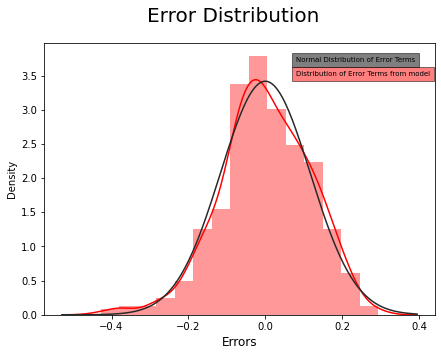

In [52]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (7,5))
from scipy.stats import norm
sns.distplot((y_train - y_train_pred),fit=norm, bins = 15, color = "r")
plt.text(0.08, 3.7, 'Normal Distribution of Error Terms',bbox=dict(facecolor='black', alpha=0.5), fontsize = 7)
plt.text(0.08, 3.5, 'Distribution of Error Terms from model',bbox=dict(facecolor='red', alpha=0.5), fontsize = 7)
# Plot heading
fig.suptitle('Error Distribution', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 12) 

One of the main assumption of linear regression is being satisfied here, that error term shall be normally distributed. From above graph, can be seen, black fit line is normally distribution line & **red line belongs to error terms.**

**To check Heteroskedasticity & Independency of error terms** we would plott residuals on y axis & predicted target variable on training set

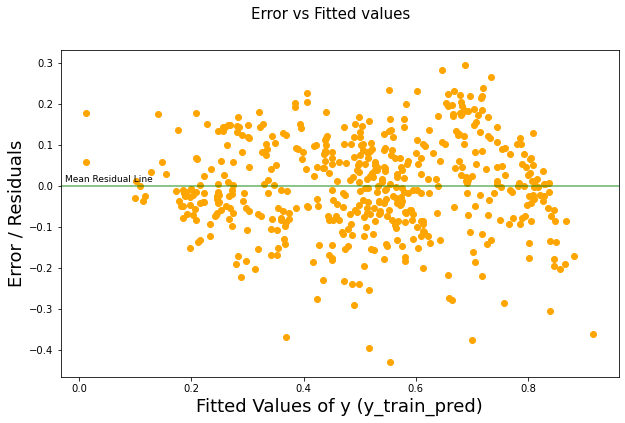

In [53]:
# Plotting Residuals and Fitted y values to understand the spread
fig = plt.figure(figsize = (10,6))
plt.scatter(y_train_pred, (y_train - y_train_pred),color='orange')
fig.suptitle('Error vs Fitted values', fontsize = 15) # Plot heading 
plt.xlabel('Fitted Values of y (y_train_pred)', fontsize = 18)  # X-label
plt.ylabel('Error / Residuals', fontsize = 18)  
plt.axhline(y=(y_train - y_train_pred).mean(), color='green', linestyle='-', alpha=0.6)
plt.text(-0.025,0.01, 'Mean Residual Line', fontsize = 9)
ax = plt.subplot()
plt.show()

## Using model to predict on test data set

First test data set needs to be scaled as done in train data set. Here we will just use transform and will not do fit_transform, as fitting i.e. -1 to 1 done on train data. 

In [54]:
X_train_rfe_4.head() #recalling 4th iteration train data set


,const,yr,holiday,workingday,temp,weekday_Mon,weekday_Tue,weathersit_Light Snow
576,1.0,1,0,1,0.815169,0,0,0
426,1.0,1,0,0,0.442393,1,0,0
728,1.0,1,0,0,0.245101,0,1,0
482,1.0,1,0,0,0.395666,1,0,0
111,1.0,0,0,1,0.345824,0,0,0


In [55]:
vars #these columns afain shall be subjected for scaling in test data

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [56]:
#Using only transform from scaler
test[vars] = scaler.transform(test[vars]) 
test.shape

(220, 32)

In [57]:
#Preparing y_test
y_test = test.pop('cnt')

In [58]:
X_test = test.drop(['casual', 'registered', 'atemp'], axis =1)
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
X_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist-Few clouds
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
X_train_rfe_4.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'weekday_Mon',
       'weekday_Tue', 'weathersit_Light Snow'],
      dtype='object')

In [61]:
X_test = sm.add_constant(X_test)
X_test_rfe_4 = X_test[X_train_rfe_4.columns]
X_test_rfe_4.head()

,const,yr,holiday,workingday,temp,weekday_Mon,weekday_Tue,weathersit_Light Snow
184,1.0,0,1,0,0.831783,0,0,0
535,1.0,1,0,1,0.901354,0,0,0
299,1.0,0,0,1,0.511964,0,0,0
221,1.0,0,0,1,0.881625,0,0,0
152,1.0,0,0,1,0.817246,0,0,0


In [62]:
y_test_pred = linreg_4.predict(X_test_rfe_4)

Text(0, 0.5, 'y_test_pred')

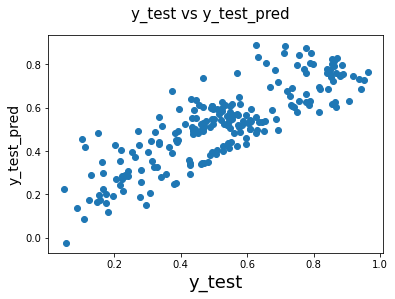

In [63]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 15) # Plot heading 
plt.xlabel('y_test', fontsize = 18)  # X-label
plt.ylabel('y_test_pred', fontsize = 14)  

In [64]:
# r2_score with 4th iteration
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6963068519812626

**R2 value on training set(*4th iteration*) is 72.9% and now on test set is 69.6%. We can say selected model fits well on test data as well.**

The linear model equation can be given as:
Cnt = 0.0576* const + 0.2322 * yr +(-0.0399) * holiday + 0.0423  * workingday + 0.5747 * temp + 0.0518 * Monday + 0.0034 * Tuesday + (-0.2369) * Light Snow

Observations:
1. The “temperature” has strongest positive impact on bike rentals
2. Next is the weather conditions have considerable negative corelation with count. During light snow condition rentals would reduce.
3. Holiday and whether a working day or not has an impact on bike sharing count. Holiday reduces the count by coefficient 0.04, while working day has higher bike users mainly due to Registered users (seen from univariate analysis) This may be due to people using bikes for commuting to office.


In [65]:
linreg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     225.4
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          4.69e-139
Time:                        21:24:48   Log-Likelihood:                 371.73
No. Observations:                 510   AIC:                            -729.5
Df Residuals:                     503   BIC:                            -699.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0576      0.013      4.578      0.000       0.033       0.082
yr                        0.2322      0.010     22.121      0.000       0.212       0.253
holiday                  -0.0399      0.026     -1.510      0.132      -0.092       0.012
workingday                0.0423      0.010      4.341      0.000       0.023       0.061
temp                      0.5747      0.023     24.667      0.000       0.529       0.621
weekday_Mon               0.0518      0.013      3.965      0.000       0.026       0.077
weekday_Tue               0.0034      0.013      0.255      0.799      -0.023       0.030
weathersit_Light Snow    -0.2369      0.031     -7.662      0.000      -0.298      -0.176
==============================================================================
Omnibus:                       11.781   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.186
Skew:                          -0.331   Prob(JB):                      0.00226
Kurtosis:                       3.368   Cond. No.                     7.94e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""